<a href="https://colab.research.google.com/github/amira364/RN/blob/main/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

## 1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.

In [ ]:
df = pd.read_csv('Iris.csv')

## 2-Afficher les 10 premières lignes du DataFrame.

In [ ]:
print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


## 3-Afficher les dimensions du dataframe.




In [ ]:
df.shape

(150, 6)

## 4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.

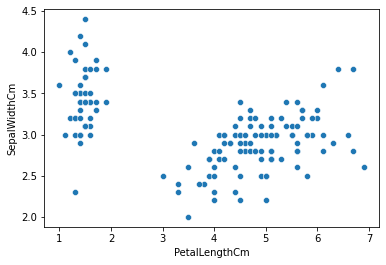

In [ ]:
fg = sb.scatterplot(x=df['PetalLengthCm'], y=df['SepalWidthCm'])

## 5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.( Iris_Setosa → 0 ,Iris_Versicolor→ 1 et Iris_Virginica → 2 )

In [ ]:
df['Species'] = df['Species'].replace(['Iris-setosa'], '0')
df['Species'] = df['Species'].replace(['Iris-versicolor'], '1')
df['Species'] = df['Species'].replace(['Iris-virginica'], '2')

## 6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.

In [ ]:
print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0
5   6            5.4           3.9            1.7           0.4       0
6   7            4.6           3.4            1.4           0.3       0
7   8            5.0           3.4            1.5           0.2       0
8   9            4.4           2.9            1.4           0.2       0
9  10            4.9           3.1            1.5           0.1       0


## 7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).

In [ ]:
x = df.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df.loc[:,['Species']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7)

## 8-Afficher les 10 premières données d’apprentissage et celles de test.

In [ ]:
print(xtrain.head(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
67             5.8           2.7            4.1           1.0
129            7.2           3.0            5.8           1.6
93             5.0           2.3            3.3           1.0
41             4.5           2.3            1.3           0.3
119            6.0           2.2            5.0           1.5
84             5.4           3.0            4.5           1.5
95             5.7           3.0            4.2           1.2
12             4.8           3.0            1.4           0.1
122            7.7           2.8            6.7           2.0
71             6.1           2.8            4.0           1.3


In [ ]:
print(xtest.head(10))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
131            7.9           3.8            6.4           2.0
36             5.5           3.5            1.3           0.2
58             6.6           2.9            4.6           1.3
60             5.0           2.0            3.5           1.0
55             5.7           2.8            4.5           1.3
126            6.2           2.8            4.8           1.8
82             5.8           2.7            3.9           1.2
48             5.3           3.7            1.5           0.2
57             4.9           2.4            3.3           1.0
148            6.2           3.4            5.4           2.3


In [ ]:
print(ytrain.head(10))

    Species
67        1
129       2
93        1
41        0
119       2
84        1
95        1
12        0
122       2
71        1


In [ ]:
print(ytest.head(10))

    Species
131       2
36        0
58        1
60        1
55        1
126       2
82        1
48        0
57        1
148       2


## 9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150) .

In [ ]:
clas =  MLPClassifier(epsilon=0.07,hidden_layer_sizes=(4,),max_iter=150,solver="lbfgs")
clas.fit(xtrain , ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), max_iter=150,
              solver='lbfgs')

## 10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.

In [ ]:
prediction=clas.predict(xtest)
prediction


array(['2', '0', '1', '1', '1', '2', '1', '0', '1', '2', '1', '2', '0',
       '2', '0', '0', '0', '2', '0', '0', '1', '2', '1', '1', '1', '1',
       '0', '0', '2', '0', '0', '0', '2', '0', '1', '2', '0', '1', '1',
       '1', '2', '1', '2', '1', '2'], dtype='<U1')

In [ ]:

%time
print('the accuracy is :',metrics.accuracy_score(prediction,ytest))
     

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
the accuracy is : 0.9777777777777777


## 11-Afficher la matrice de confusion associée à notre cas.



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


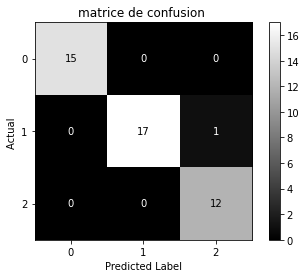

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

color = 'black'
matrix = plot_confusion_matrix(clas, xtest, ytest, cmap=plt.cm.gray)
matrix.ax_.set_title('matrice de confusion ', color=color)

plt.xlabel('Predicted Label', color=color)
plt.ylabel('Actual ', color=color)

plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()



In [ ]:
!pip install pretty-confusion-matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 4.4 MB/s 
     |████████████████████████████████| 156 kB 58.1 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 103 kB 73.8 MB/s 
     |████████████████████████████████| 199 kB 59.6 MB/s 
     |████████████████████████████████| 41 kB 556 kB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 295 kB 60.5 MB/s 
     |████████████████████████████████| 965 kB 53.4 MB/s 
     |████████████████████████████████| 8.8 MB 40.0 MB/s 
     |████████████████████████████████| 98 kB 8.7 MB/s 
     |████████████████████████████████| 468 kB 58.7 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=86c0dd3dc516fc649d8366275d522953a15eeafc3594a88dcca563dacd72016d
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

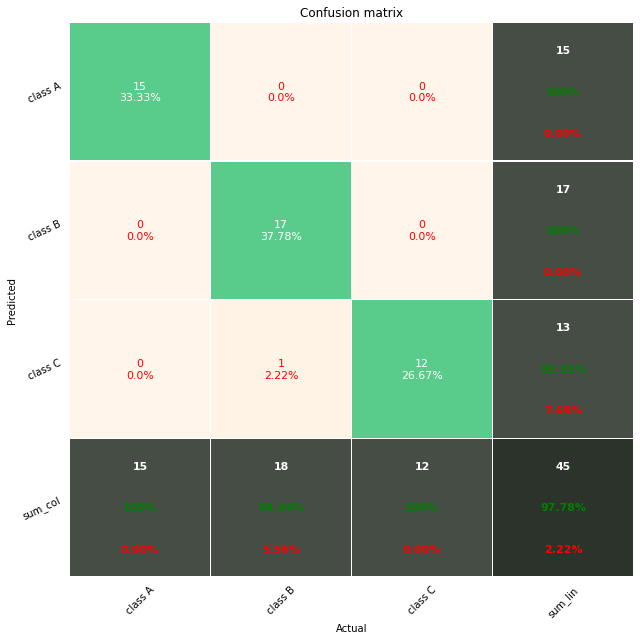

In [ ]:
#autrement:
from pretty_confusion_matrix import pp_matrix_from_data
pp_matrix_from_data( ytest,prediction )
#ceci x :test y: predict d'ou ce matrice l'inverce du l'autre en premier methode


## 12-Selon les résultats affichés commenter le perceptron que vous avez utilisé.

In [ ]:
print('Error :' + str(1-metrics.accuracy_score(ytest, prediction)))

Error :0.022222222222222254


Ce perceptron est performant ; il done une précision de 97.78%

le classe A sont prédites correctements car on a 100% True et 0% False, de meme pour la classe C. Mais les valeurs du classe B sont prédites moin perfetement car on a 94.12% True et 5.88:% False.

## 13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7

In [ ]:
from sklearn.neural_network import MLPClassifier 
clas=MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,max_iter=150, solver='sgd')
clas.fit(xtrain , ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

## 14-Nous allons étudier la variation du paramètre de taux d’apprentissage, donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test en fonction de variation du taux d’apprentissage.

In [ ]:
params= [ 
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter": 150,  
    },

    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter": 300, 
    },
     {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init": 0.2,
        "max_iter": 300,
    },

     {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init": 0.7,
        "max_iter": 150,  
    },
    {
        "solver":"adam",
        "learning_rate_init": 0.01,
        "max_iter": 300,    
    },
]

labels=[
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",
]

plot_args=[
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]


In [ ]:
mlps = []
for label, param in zip(labels, params):
    print('training : %s' % label)
    mlp=MLPClassifier(random_state=0, **param)
    mlp.fit(xtrain, ytrain)
    mlps.append(mlp)
    print("training set score : %f" % mlp.score(xtrain, ytrain))

mlps2=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(xtest,ytest)
  mlps2.append(mlp)
  print("Training set score : %f" % mlp.score(xtest,ytest))

training : constant learning-rate_0.2
training set score : 0.333333
training : constant learning-rate_0.7
training set score : 0.304762
training : invscaling learning-rate_0.2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

training set score : 0.971429
training : invscaling learning-rate_0.7
training set score : 0.980952
training : adam
training set score : 0.980952
training:constant learning-rate_0.2
Training set score : 0.333333
training:constant learning-rate_0.7
Training set score : 0.400000
training:invscaling learning-rate_0.2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteratio

Training set score : 1.000000
training:invscaling learning-rate_0.7
Training set score : 0.977778
training:adam


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score : 1.000000


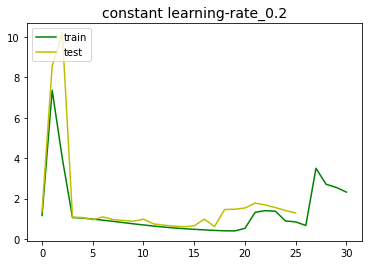

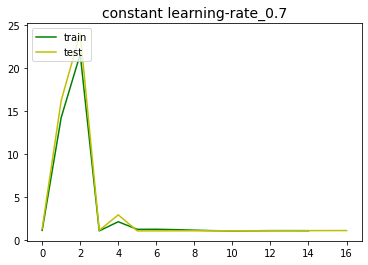

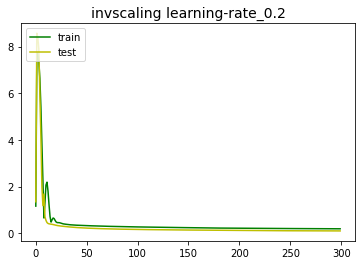

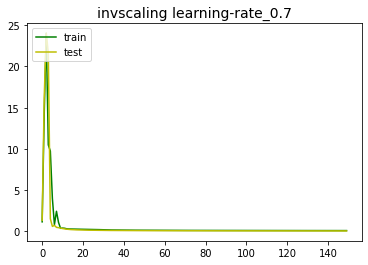

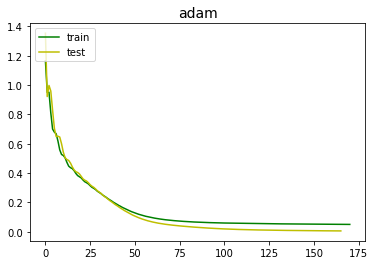

In [ ]:
for mlp1, mlp2, label, args in zip(mlps, mlps2,labels,plot_args):
  plt.plot(mlp1.loss_curve_ , 'g', label=label)
  plt.plot(mlp2.loss_curve_ , 'y', label=label)
  plt.title(label,fontsize=14)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## 15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début. Quel est le phénomène constaté ? et comment pouvons- nous surmonter celui-ci ?




Lorsque nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début ca va prendre longtemps .



 le phénomène constaté : **overfitting ou surapprentissage** :  Il survient lorsque le modèle essaie de trop s'adapter aux données d'entraînement. Il est trop flexible et trop complexe et s'adapte à des données qui ne sont pas forcément à prendre en compte. Cette situation augmente considérablement les marges d'erreur, alors que la précision est ce que l'on recherche le plus en matière d'analyse de données

On peut surmonter celui-ci par : *Enlever certaines variables
*Ajouter des données d'entraînement
*diviser l'ensemble de données en deux ensembles : l'entraînement et les tests. Un ratio de partage commun est de 80 % pour la formation et de 20 % pour les tests.
*Faire la sélection des fonctionnalités :
Si nous n'avons qu'un nombre limité d'échantillons d'apprentissage, chacun avec un grand nombre de fonctionnalités, nous ne devons sélectionner que les fonctionnalités les plus importantes pour la formation afin que notre modèle n'ait pas besoin d'apprendre pour autant de fonctionnalités et éventuellement de sur-adapter.

In [ ]:
from sklearn import model_selection 
RN= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=1500,alpha=1e-5)
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)

In [ ]:
RN.fit(xtrain,ytrain)
prediction=RN.predict(xtrain)
prediction

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['1', '0', '2', '2', '1', '1', '0', '2', '0', '2', '2', '0', '0',
       '1', '1', '0', '0', '2', '1', '2', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '2', '2', '1', '1', '2', '0', '1', '0', '1',
       '1', '0', '0', '2', '0', '2', '2', '2', '2', '2', '1', '0', '2',
       '2', '1', '2', '1', '1', '2', '2', '0', '1', '0', '2', '0', '2',
       '0', '2', '0', '1', '1', '2', '1', '0', '1', '2', '0', '1', '0',
       '2', '0', '2', '1', '1', '1', '2', '1', '1', '1', '2', '0', '1',
       '0', '1', '0', '0', '1', '2', '0', '2', '0', '0', '0', '2', '2',
       '0'], dtype='<U1')

In [ ]:
metrics.accuracy_score(prediction,ytrain)

1.0

In [ ]:
metrics.confusion_matrix(ytrain,prediction)

array([[38,  0,  0],
       [ 0, 33,  0],
       [ 0,  0, 34]])

## 16-Tester d’autres classifieurs de type réseau de neurones(Dynamique/Récurrent et Non récurrent) .

In [ ]:
!pip install  tensorflow keras  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Dropout
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils

In [ ]:
x=df.values[:,0:4]
y=df.values[:,5]
x=x.reshape(x.shape+(1,))
x = np.asarray(x).astype('float32')
y=np_utils.to_categorical(df.values[:,5])
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.8)

In [ ]:
model = Sequential()
model.add(Dense(4,input_shape=(4,),activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
iris_model = model.fit(xtrain, ytrain, epochs=500, batch_size=7)

Epoch 1/500
18/18 [==============================] - 1s 4ms/step - loss: 16.6038 - accuracy: 0.3333
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 13.3779 - accuracy: 0.3333
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 10.3432 - accuracy: 0.3333
Epoch 4/500
18/18 [==============================] - 0s 3ms/step - loss: 7.5309 - accuracy: 0.3333
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 5.8661 - accuracy: 0.3250
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 5.3621 - accuracy: 0.3667
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 4.8013 - accuracy: 0.2333
Epoch 8/500
18/18 [==============================] - 0s 6ms/step - loss: 4.2790 - accuracy: 0.1917
Epoch 9/500
18/18 [==============================] - 0s 3ms/step - loss: 3.8261 - accuracy: 0.3583
Epoch 10/500
18/18 [==============================] - 0s 6ms/step - loss: 3.2930 - accuracy: 0.2750
Epoch 

In [ ]:
_,test=model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 21ms/step - loss: 0.0718 - accuracy: 1.0000


## 17-Dans notre cas de base de donnée Iris, est ce qu’il est intéressant d’avoir un réseau de neurones récurrent ou non ? justifier vos réponses.

Dans notre cas de base de donnée Iris,il n'est pas intéressant d’avoir un réseau de neurones récurrent car pour un RNR est un réseau de neurones présentant des connexions récurrentes, utilise des sorties qui sont une combinaison non linéaire de ses entrée,  les données à un instant t dépendent des données à l'instant t-1.